# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [ ]:
from aitlas.datasets import LandCoverAiDataset
from aitlas.models import Unet
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTranspose

## Visualize images and masks

Total number of patches: 7470


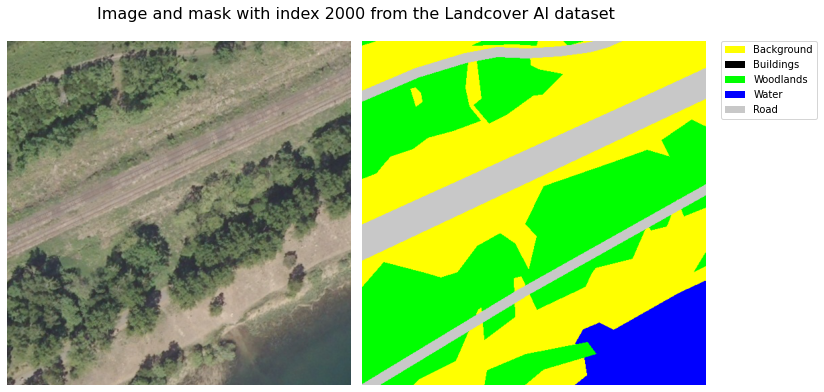

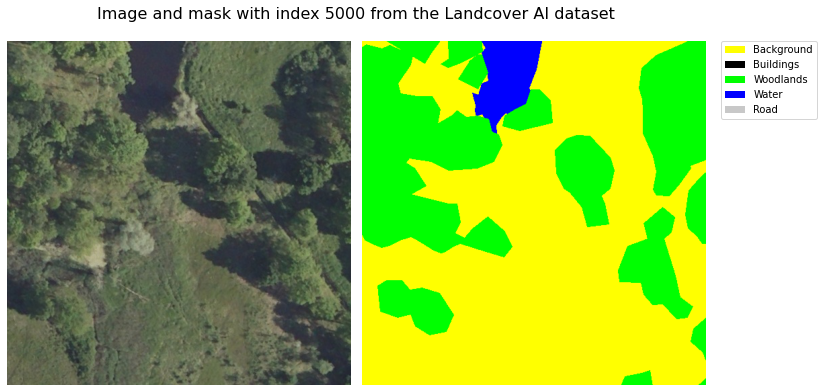

In [2]:
dataset_config = {
    "data_dir": "../data/landcoverai/output",
    "csv_file": "../data/landcoverai/train.txt"
}
dataset = LandCoverAiDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(2000);
dataset.show_image(5000);

In [3]:
dataset.data_distribution_table()

,Number of pixels
Background,1.134440e+09
Buildings,1.676724e+07
Woodlands,6.487147e+08
Water,1.265083e+08
Road,3.178538e+07


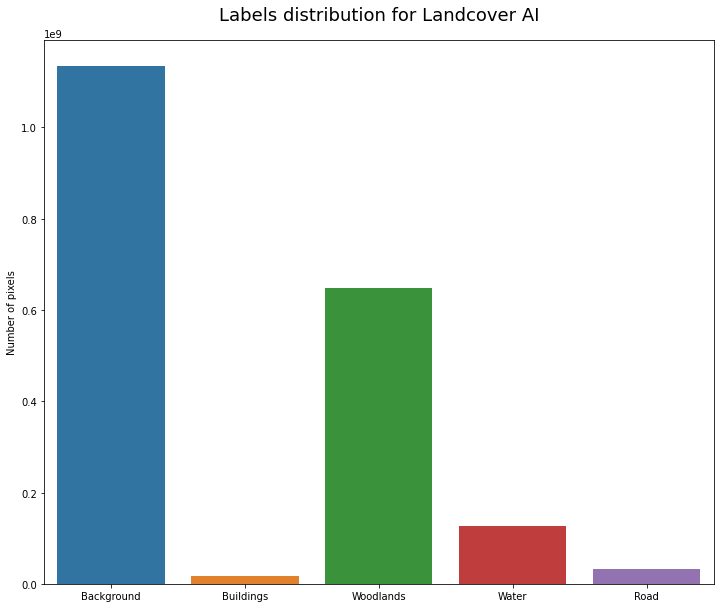

In [4]:
dataset.data_distribution_barchart();

## Load train data

In [5]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "csv_file": "../data/landcoverai/train.txt",
    "data_dir": "../data/landcoverai/output",
    "joint_transforms": ["aitlas.transforms.FlipHVRandomRotate"],
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = LandCoverAiDataset(train_dataset_config)

validation_dataset_config = {
    "batch_size": 16,
    "shuffle": False,
    "csv_file": "../data/landcoverai/val.txt",
    "data_dir": "../data/landcoverai/output",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
validation_dataset = LandCoverAiDataset(validation_dataset_config)
len(train_dataset), len(validation_dataset)

(7470, 1602)

## Create the model

In [6]:
epochs = 20
model_directory = "./experiments/landcoverai"
model_config = {
    "num_classes": 5, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = Unet(model_config)
model.prepare()

## Start the training

In [7]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    val_dataset=validation_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2022-10-30 20:06:50,389 INFO Starting training.
training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:59<00:00,  3.92it/s]
2022-10-30 20:08:49,657 INFO epoch: 1, time: 119, loss:  0.38059
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:05<00:00,  7.11it/s]
2022-10-30 20:09:55,967 INFO IOU:0.8419118808398038, IOU mean:0.5115928046201125, IOU per Class:[8.72940583e-01 1.04333393e-02 8.51218922e-01 8.23084803e-01
 2.86374854e-04]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:09<00:00, 10.16it/s]
2022-10-30 20:10:05,917 INFO IOU:0.8447924597715399, IOU mean:0.5122921286228586, IOU per Class:[8.76278155e-01 1.18954224e-02 8.52686762e-01 8.20283879e-01
 3.16424942e-04]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 0 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:58<00:00,  3.95it/s]
2022-10-30 20:12:04,065 INFO epoch: 2, time: 119, loss:  0.15031
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:04<00:00,  7.19it/s]
2022-10-30 20:13:09,080 INFO IOU:0.8577282147568871, IOU mean:0.5705916078906276, IOU per Class:[8.82220198e-01 8.09383843e-06 8.69194267e-01 8.39449767e-01
 2.62085713e-01]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00,  9.96it/s]
2022-10-30 20:13:19,236 INFO IOU:0.8637141783253376, IOU mean:0.5828504685182948, IOU per Class:[8.89905553e-01 5.11384571e-07 8.66685464e-01 8.63448776e-01
 2.94212039e-01]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 1 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:59<00:00,  3.91it/s]
2022-10-30 20:15:18,821 INFO epoch: 3, time: 119, loss:  0.10186
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:06<00:00,  6.98it/s]
2022-10-30 20:16:25,814 INFO IOU:0.8644481866578079, IOU mean:0.5740597225580801, IOU per Class:[8.92784082e-01 2.39290626e-05 8.79208786e-01 7.78266298e-01
 3.20015518e-01]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:09<00:00, 10.23it/s]
2022-10-30 20:16:35,694 INFO IOU:0.8697427204581167, IOU mean:0.5803727415804696, IOU per Class:[8.99744462e-01 2.25947147e-05 8.79382052e-01 7.76864133e-01
 3.45850465e-01]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 2 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:58<00:00,  3.93it/s]
2022-10-30 20:18:34,657 INFO epoch: 4, time: 119, loss:  0.08825
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:05<00:00,  7.15it/s]
2022-10-30 20:19:40,007 INFO IOU:0.8728523034479915, IOU mean:0.7103204683049149, IOU per Class:[0.89215636 0.48723728 0.86803885 0.90573314 0.39843672]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00, 10.05it/s]
2022-10-30 20:19:50,062 INFO IOU:0.8761025947864016, IOU mean:0.7238826060137614, IOU per Class:[0.89765274 0.52384506 0.86429469 0.90844894 0.4251716 ]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 3 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:55<00:00,  4.03it/s]
2022-10-30 20:21:45,972 INFO epoch: 5, time: 115, loss:  0.07465
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:04<00:00,  7.26it/s]
2022-10-30 20:22:50,330 INFO IOU:0.8958376822833621, IOU mean:0.7679523250439796, IOU per Class:[0.91345349 0.62652999 0.89085394 0.91408571 0.4948385 ]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:09<00:00, 10.70it/s]
2022-10-30 20:22:59,780 INFO IOU:0.9002821868124863, IOU mean:0.7761340478492078, IOU per Class:[0.91933964 0.63101345 0.89056064 0.91556494 0.52419157]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 4 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:58<00:00,  3.95it/s]
2022-10-30 20:24:58,181 INFO epoch: 6, time: 119, loss:  0.06933
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:05<00:00,  7.17it/s]
2022-10-30 20:26:03,351 INFO IOU:0.8962800195304006, IOU mean:0.7796697055696945, IOU per Class:[0.91544386 0.6712472  0.8834012  0.92725092 0.50100535]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00, 10.04it/s]
2022-10-30 20:26:13,419 INFO IOU:0.9002764225884652, IOU mean:0.7877087207575754, IOU per Class:[0.92137317 0.68459643 0.88144855 0.92597495 0.5251505 ]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 5 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:59<00:00,  3.89it/s]
2022-10-30 20:28:13,450 INFO epoch: 7, time: 120, loss:  0.06378
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:05<00:00,  7.15it/s]
2022-10-30 20:29:18,814 INFO IOU:0.8808923162350698, IOU mean:0.7292030214230989, IOU per Class:[0.89963406 0.56722105 0.88959049 0.84164163 0.44792788]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:09<00:00, 10.15it/s]
2022-10-30 20:29:28,775 INFO IOU:0.8830896498901663, IOU mean:0.7278151390208056, IOU per Class:[0.90411619 0.54080675 0.88949933 0.82987372 0.4747797 ]
2022-10-30 20:29:28,777 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 6 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:59<00:00,  3.92it/s]
2022-10-30 20:31:27,894 INFO epoch: 8, time: 119, loss:  0.06338
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:03<00:00,  7.34it/s]
2022-10-30 20:32:31,547 INFO IOU:0.9018482849473836, IOU mean:0.7956289861069592, IOU per Class:[0.92036582 0.68769971 0.89055453 0.92394516 0.55557971]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00,  9.89it/s]
2022-10-30 20:32:41,769 INFO IOU:0.9038851956388202, IOU mean:0.7990904148949836, IOU per Class:[0.92372605 0.69597967 0.88885797 0.91968298 0.56720541]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 7 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:58<00:00,  3.94it/s]
2022-10-30 20:34:40,488 INFO epoch: 9, time: 119, loss:  0.05891
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:05<00:00,  7.09it/s]
2022-10-30 20:35:46,353 INFO IOU:0.9036494910232252, IOU mean:0.8067723277602671, IOU per Class:[0.91998857 0.71743992 0.89417464 0.93088881 0.5713697 ]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00, 10.10it/s]
2022-10-30 20:35:56,370 INFO IOU:0.9051578331492106, IOU mean:0.80952189277402, IOU per Class:[0.92376783 0.72570182 0.89010995 0.9275681  0.58046176]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 8 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:58<00:00,  3.94it/s]
2022-10-30 20:37:55,081 INFO epoch: 10, time: 119, loss:  0.05492
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:07<00:00,  6.90it/s]
2022-10-30 20:39:02,845 INFO IOU:0.9063455289278467, IOU mean:0.811850737140882, IOU per Class:[0.92184736 0.71850562 0.89860578 0.93459199 0.58570294]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00,  9.70it/s]
2022-10-30 20:39:13,266 INFO IOU:0.9076664998930527, IOU mean:0.8153154171550687, IOU per Class:[0.92578367 0.73339622 0.89426527 0.92781165 0.59532029]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 9 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [02:00<00:00,  3.87it/s]
2022-10-30 20:41:13,837 INFO epoch: 11, time: 120, loss:  0.05517
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:05<00:00,  7.08it/s]
2022-10-30 20:42:20,797 INFO IOU:0.9095877542402379, IOU mean:0.8093719876594996, IOU per Class:[0.92559079 0.70040399 0.90023264 0.93320558 0.58742693]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00, 10.01it/s]
2022-10-30 20:42:30,895 INFO IOU:0.9117062181928367, IOU mean:0.8133158667517304, IOU per Class:[0.92970152 0.71726885 0.89750624 0.9304239  0.59167882]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 10 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:59<00:00,  3.90it/s]
2022-10-30 20:44:30,764 INFO epoch: 12, time: 120, loss:  0.05658
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:06<00:00,  7.02it/s]
2022-10-30 20:45:37,348 INFO IOU:0.9110043892764451, IOU mean:0.8181560649507068, IOU per Class:[0.92643238 0.73239264 0.90230122 0.93660885 0.59304523]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00,  9.80it/s]
2022-10-30 20:45:47,666 INFO IOU:0.9122558473165828, IOU mean:0.820498852520017, IOU per Class:[0.92970981 0.74234507 0.89879284 0.93080684 0.60083971]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 11 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:58<00:00,  3.93it/s]
2022-10-30 20:47:46,478 INFO epoch: 13, time: 119, loss:  0.05249
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:06<00:00,  7.01it/s]
2022-10-30 20:48:53,140 INFO IOU:0.9094691757640101, IOU mean:0.8192977057679117, IOU per Class:[0.92568445 0.73861942 0.89683912 0.94047616 0.59486937]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00,  9.92it/s]
2022-10-30 20:49:03,334 INFO IOU:0.9118506643485057, IOU mean:0.8217556816344695, IOU per Class:[0.92994527 0.74688629 0.89554963 0.93148013 0.60491709]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 12 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [02:00<00:00,  3.89it/s]
2022-10-30 20:51:03,491 INFO epoch: 14, time: 120, loss:  0.05179
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:03<00:00,  7.38it/s]
2022-10-30 20:52:06,849 INFO IOU:0.9131261138719119, IOU mean:0.8243478846999619, IOU per Class:[0.92859458 0.74459721 0.90308168 0.94232497 0.60314098]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00,  9.96it/s]
2022-10-30 20:52:16,995 INFO IOU:0.9137553556224884, IOU mean:0.8268611725243783, IOU per Class:[0.93114248 0.75493849 0.8991688  0.93267021 0.61638589]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 13 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:59<00:00,  3.90it/s]
2022-10-30 20:54:16,755 INFO epoch: 15, time: 119, loss:  0.05446
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:05<00:00,  7.18it/s]
2022-10-30 20:55:21,868 INFO IOU:0.9073433711837218, IOU mean:0.8148746561330557, IOU per Class:[0.92309787 0.73226503 0.89941101 0.92745437 0.59214501]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00,  9.90it/s]
2022-10-30 20:55:32,078 INFO IOU:0.9067247872728325, IOU mean:0.8177059206930266, IOU per Class:[0.9247567  0.73816188 0.89222535 0.92387744 0.60950823]
2022-10-30 20:55:32,079 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 14 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [02:00<00:00,  3.86it/s]
2022-10-30 20:57:33,062 INFO epoch: 16, time: 121, loss:  0.05340
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:05<00:00,  7.17it/s]
2022-10-30 20:58:38,249 INFO IOU:0.9088261806709763, IOU mean:0.8155857304620309, IOU per Class:[0.92426671 0.73823862 0.9026825  0.92293481 0.58980602]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00, 10.07it/s]
2022-10-30 20:58:48,290 INFO IOU:0.9088879253633653, IOU mean:0.8150766616465189, IOU per Class:[0.92662485 0.73346532 0.89719873 0.9186766  0.59941781]
2022-10-30 20:58:48,292 INFO INFO: Early stopping counter 2 of 10
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 15 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:58<00:00,  3.93it/s]
2022-10-30 21:00:47,247 INFO epoch: 17, time: 119, loss:  0.04942
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:05<00:00,  7.15it/s]
2022-10-30 21:01:52,617 INFO IOU:0.9158768516085891, IOU mean:0.8279671900798528, IOU per Class:[0.93078377 0.76352625 0.90522328 0.94414067 0.59616199]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00,  9.73it/s]
2022-10-30 21:02:03,005 INFO IOU:0.914752777505861, IOU mean:0.8260946568678506, IOU per Class:[0.93203338 0.76434459 0.89927519 0.93523338 0.59958673]
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 16 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:58<00:00,  3.95it/s]
2022-10-30 21:04:01,411 INFO epoch: 18, time: 118, loss:  0.05160
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:06<00:00,  7.07it/s]
2022-10-30 21:05:07,486 INFO IOU:0.9169106419982723, IOU mean:0.8250634280007457, IOU per Class:[0.93153782 0.76102973 0.90821274 0.94357802 0.58095883]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:09<00:00, 10.19it/s]
2022-10-30 21:05:17,405 INFO IOU:0.9159947036776972, IOU mean:0.8231038601188555, IOU per Class:[0.9329675  0.76217063 0.90314391 0.93163125 0.585606  ]
2022-10-30 21:05:17,407 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 17 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:58<00:00,  3.94it/s]
2022-10-30 21:07:16,035 INFO epoch: 19, time: 119, loss:  0.04792
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:06<00:00,  6.99it/s]
2022-10-30 21:08:22,937 INFO IOU:0.9128539398851757, IOU mean:0.8257237864588222, IOU per Class:[0.92876867 0.76116491 0.90190359 0.93084947 0.60593229]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:09<00:00, 10.74it/s]
2022-10-30 21:08:32,352 INFO IOU:0.9099063346195189, IOU mean:0.8247892566568537, IOU per Class:[0.92824218 0.76274016 0.8913974  0.93106436 0.61050218]
2022-10-30 21:08:32,353 INFO INFO: Early stopping counter 2 of 10
training:   0%|                                                                                 | 0/467 [00:00<?, ?it/s]


LR 18 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 467/467 [01:59<00:00,  3.90it/s]
2022-10-30 21:10:32,015 INFO epoch: 20, time: 120, loss:  0.05029
testing on train set: 100%|███████████████████████████████████████████████████████████| 467/467 [01:06<00:00,  7.01it/s]
2022-10-30 21:11:38,651 INFO IOU:0.9173768551920145, IOU mean:0.8365606431774752, IOU per Class:[0.9317934  0.77243815 0.90753271 0.94267618 0.62836277]
testing on validation set: 100%|██████████████████████████████████████████████████████| 101/101 [00:10<00:00,  9.85it/s]
2022-10-30 21:11:48,911 INFO IOU:0.9150872852229471, IOU mean:0.8324049678079353, IOU per Class:[0.93196652 0.77559278 0.90149781 0.92523856 0.62772918]



LR 19 0.0001


2022-10-30 21:11:50,180 INFO Train loss: [0.1809039613249471, 0.10202773905582377, 0.08515340198514612, 0.0775413287412051, 0.0617917098932796, 0.05822247657949826, 0.06684173125140319, 0.05437587508395653, 0.05254804524312536, 0.04994355097831971, 0.048760321620637315, 0.047609716706686074, 0.047608290537892575, 0.04565329938388892, 0.04921638143848543, 0.048915948882359894, 0.04418422074083343, 0.043572981740376715, 0.0463202095404766, 0.04286556312916588]
2022-10-30 21:11:50,181 INFO Validation loss: [0.18311385269022165, 0.09903979059611069, 0.08210515117414584, 0.07569974632038456, 0.0595412812057357, 0.056046627192163884, 0.065450592043248, 0.05270531787519598, 0.05123543035652903, 0.04926124221172077, 0.04769707893424861, 0.047094168943747156, 0.04698294505346729, 0.045344071144170675, 0.050218038121412754, 0.04946694844466321, 0.04469749238923397, 0.04482161792253287, 0.04775041890110862, 0.0444020147478387]
2022-10-30 21:11:50,181 INFO Train time per epochs: [119, 119, 119, 11

## Evalute the model using test data

In [13]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "data_dir": "../data/landcoverai/output",
    "csv_file": "../data/landcoverai/test.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = LandCoverAiDataset(test_dataset_config)
len(test_dataset)

model = Unet(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "./experiments/landcoverai/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2022-10-30 21:16:14,989 INFO Loading checkpoint ./experiments/landcoverai/checkpoint.pth.tar
2022-10-30 21:16:15,288 INFO Loaded checkpoint ./experiments/landcoverai/checkpoint.pth.tar at epoch 21
testing on test set: 100%|████████████████████████████████████████████████████████████| 401/401 [00:11<00:00, 34.28it/s]


[{'IOU': 0.9114360977667845,
  'IOU mean': 0.828794907732855,
  'IOU per Class': array([0.92565326, 0.75841971, 0.90626119, 0.92866128, 0.62497911])}]

## Predictions

2022-10-30 21:19:33,897 INFO Loading checkpoint ./experiments/landcoverai/checkpoint.pth.tar
2022-10-30 21:19:34,242 INFO Loaded checkpoint ./experiments/landcoverai/checkpoint.pth.tar at epoch 21


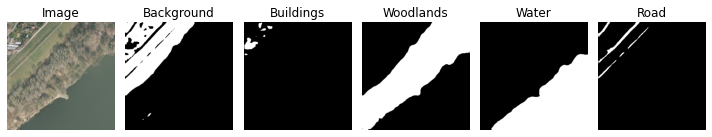

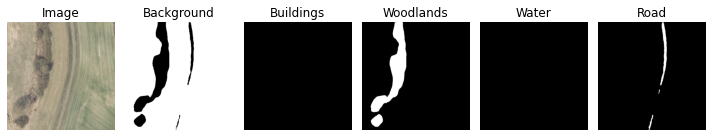

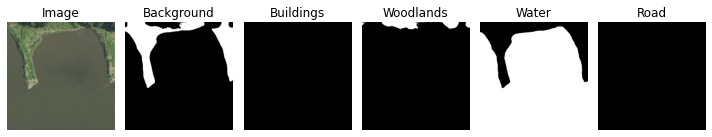

In [14]:
model_path = "./experiments/landcoverai/checkpoint.pth.tar"
#labels = LandCoverAiDataset.labels
labels = ["Background", "Buildings", "Woodlands", "Water", "Road"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('../data/landcoverai/output/N-34-97-C-b-1-2_61.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/landcoverai/output/M-33-48-A-c-4-4_49.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/landcoverai/output/N-33-139-C-d-2-2_159.jpg')
fig = model.predict_masks(image, labels, transform)